In [139]:
#data set from: https://www.kaggle.com/datasets/burak3ergun/loan-data-set

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [140]:
df = pd.read_csv("loan_data_set.csv")

In [141]:
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


FIND OUT HOW MANY MISSING VALUES INSIDE THE DATASET

In [142]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

BASICA DATA VISUALIZATION- NUMERICAL VALUE

HISTOGRAM DISTRIBUTION

<Axes: xlabel='Loan_Amount_Term', ylabel='Count'>

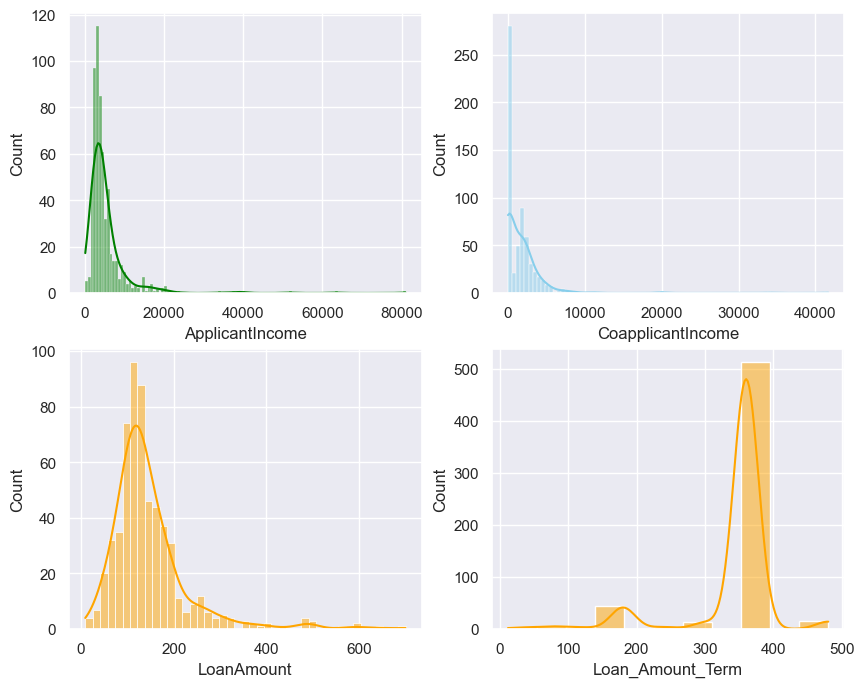

In [143]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange')
sns.histplot(data=df, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='orange')

VIOLIN PLOT DISTRIBUTION

<Axes: ylabel='Loan_Amount_Term'>

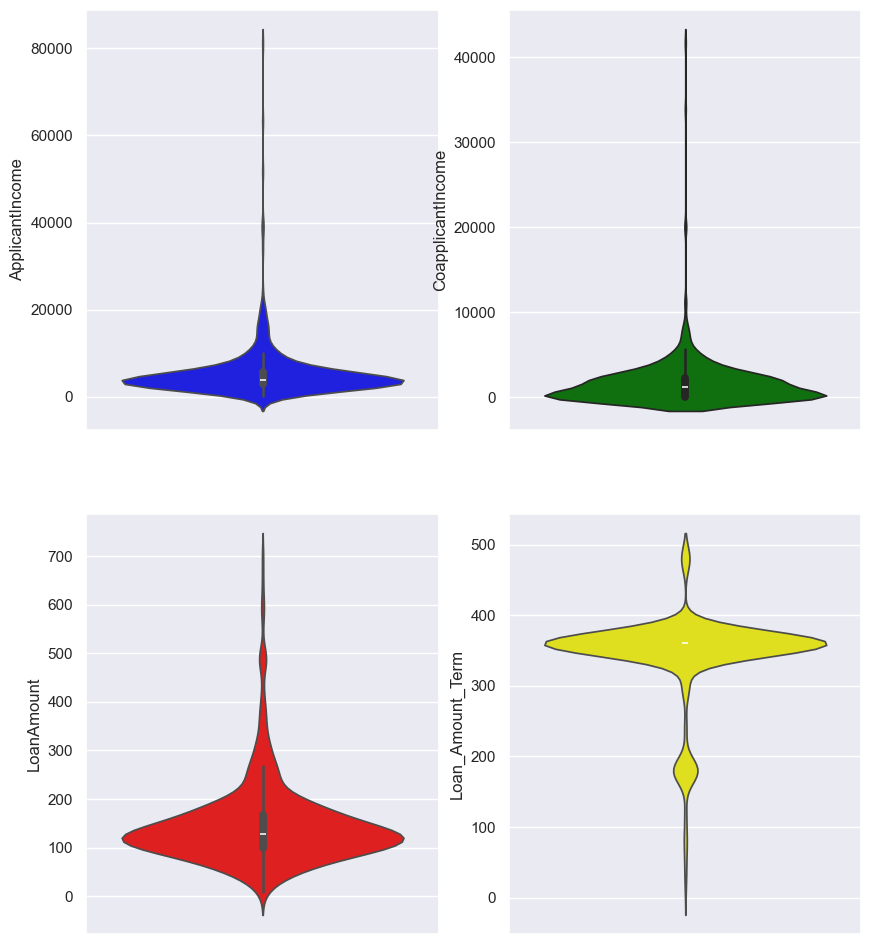

In [144]:
sns.set(style="darkgrid")

fig, axs1 = plt.subplots(2, 2, figsize=(10, 12))

sns.violinplot(data=df, y = "ApplicantIncome", ax=axs1[0,0],color="blue")
sns.violinplot(data=df, y = "CoapplicantIncome", ax=axs1[0,1],color="green")
sns.violinplot(data=df, y = "LoanAmount", ax=axs1[1,0],color="red")
sns.violinplot(data=df, y = "Loan_Amount_Term", ax=axs1[1,1],color="yellow")


FILLING THE MISSING VALUE WITH MODE FOR CATEGORICAL DATA AND MEAN FOR NUMERICAL DATA

In [145]:
#drop unnecersary variables

df = df.drop(['Loan_ID'], axis = 1)

In [146]:
#Categorical data

df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

#Numerical Data
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [147]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


AS YOU CAN SEE THERE'S NO MORE MISSING VALUE

In [148]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

DIVIDE THE DATASET

In [149]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Convert categorical variables to numerical using label encoding
le = LabelEncoder()
X = X.apply(le.fit_transform)

# Split the dataset into training and test sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

MACHINE LEARNING MODEL - DECISION TREE

In [150]:
clf = DecisionTreeClassifier()

# Fit the model on the training dataset
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [151]:
#Decision tree
# Predict on the training and test datasets
train_predictions = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Print the accuracy on the training dataset
print("Training Accuracy:", train_accuracy)


# Predict on the test dataset
test_predictions = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the accuracy on the test dataset
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.7297297297297297


MACHINE LEARNING MODEL - LOGISTIC REGRESSION

In [160]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Convert categorical variables to numerical using label encoding
le = LabelEncoder()
X = X.apply(le.fit_transform)

# Split the dataset into training and test sets (e.g., 70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=60)

In [161]:
# Create an instance of logistic regression classifier
logistic_regression = LogisticRegression()

# Train the model using the training sets
logistic_regression.fit(X_train, y_train)

c:\Users\Ikmal\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [162]:
y_pred = logistic_regression.predict(X_test)

In [163]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Accuracy: 0.7967479674796748
Confusion Matrix:
 [[ 29  47]
 [  3 167]]
Classification Report:
               precision    recall  f1-score   support

           N       0.91      0.38      0.54        76
           Y       0.78      0.98      0.87       170

    accuracy                           0.80       246
   macro avg       0.84      0.68      0.70       246
weighted avg       0.82      0.80      0.77       246



CONCLUSION

Performance: The decision tree and logistic regression models having different levels of accuracy on both the training and test datasets. Logistic regression seems to have higher accuracy